In [ ]:
# reference: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
! nvidia-smi

Tue Oct 13 16:34:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# torch downgrade for deployment of face recog
!pip install torch==1.5.0 torchvision==0.6.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 603.7MB 30kB/s 
     |████████████████████████████████| 6.5MB 35.1MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
S8_PROJECT_PATH = '/content/drive/My Drive/TSAI/TSAI-2/S8/srgan/Modular_Code/'
sys.path.insert(1, S8_PROJECT_PATH)

In [ ]:
#load dataset into the colab
path='/content/drive/My Drive/TSAI/Session 2 Dataset'
# Extracting the data by 7zipper
!7z x '{path}'.7z -o'/content/Dataset'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/My Drive/TSAI/                                       1 file, 2006710848 bytes (1914 MiB)

Extracting archive: /content/drive/My Drive/TSAI/Session 2 Dataset.7z
--
Path = /content/drive/My Drive/TSAI/Session 2 Dataset.7z
Type = 7z
Physical Size = 2006710848
Headers Size = 306080
Method = LZMA2:24
Solid = +
Blocks = 2

  0%      0% 6        0% 22 - Session 2 Dataset/FlyBirds Canada/000020.jpg                                                        0% 34 - Session 2 Dataset/FlyBirds Canada/000035.jpg

In [ ]:
!mv '/content/Dataset/Session 2 Dataset/FlyBirds Canada'/* '/content/Dataset/Session 2 Dataset/Flying Birds/' 

In [ ]:
!rm -d '/content/Dataset/Session 2 Dataset/FlyBirds Canada'

In [ ]:
!python '{S8_PROJECT_PATH}'train.py --crop_size 84 --upscale_factor 2 --num_epochs 30

# optional arguments:
# --crop_size                   training images crop size [default value is 88]
# --upscale_factor              super resolution upscale factor [default value is 4](choices:[2, 4, 8])
# --num_epochs   

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
Train Images Data:- 17613, Test Images Data:- 18
# generator parameters: 734219
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100% 548M/548M [00:11<00:00, 49.5MB/s]
# discriminator parameters: 20166977
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:14<00:00, 39.1MB/s]
[1/30] Loss_D: 0.8602 Loss_G: 0.0122 D(x): 0.7086 D(G(z)): 0.5672: 100% 276/276 [03:53<00:00,  1.18it/s]
[converting LR images to SR images] PSNR: 22.5152 dB SSIM: 0.7248: 100% 18/18 [00:01<00:00, 10.03it/s]
[saving training results]: 100% 3/3 [00:02<00:00,  1.02it/s]
[2/30] Loss_D: 0.9929 Loss_G: 0.0066 D(x): 0.6761 D(G(z)): 0.6650: 100% 276/276 [03:53<00:00,  1.18it/s]
[convertin

In [ ]:
S8_PROJECT = '/content/drive/My Drive/TSAI/TSAI-2/S8/srgan/Save_Model/'
!7z a '{S8_PROJECT}epochs.7z' '/content/epochs/'
!7z a '{S8_PROJECT}results.7z' '/content/training_results/'
!7z a '{S8_PROJECT}stats.7z' '/content/statistics/'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive:
  0M Scan  /content/                    1 folder, 60 files, 2510654444 bytes (2395 MiB)

Creating archive: /content/drive/My Drive/TSAI/TSAI-2/S8/srgan/Save_Model/epochs.7z

Items to compress: 61

  0%      0% + epochs/netD_epoch_4_1.pth                                  1% + epochs/netD_epoch_4_1.pth                                  2% + epochs/netD_epoch_4_1.pth                                  3% + epochs/netD_epoch_4_1.pth                                  3% 1 + epochs/n

Animation of Training Set

In [ ]:
from pathlib import Path
filenames = list(Path('/content/training_results/SRF_4/').glob('*.png'))
filenames.sort()

In [ ]:
from PIL import Image as Im
img_list = list(map(lambda x:Im.open(x), filenames))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
#%%capture
fig = plt.figure(figsize=(10,8))
plt.axis("off")
ims = [[plt.imshow(i, animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

In [ ]:
!sudo apt install imagemagick
ani.save(f'{S8_PROJECT}srgan.gif', writer='imagemagicka', fps=60)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

Plotting of Curves

Generator Discrimantor Loss

In [ ]:
import pandas as pd
results = pd.read_csv('/content/statistics/srf_4_train_results.csv')

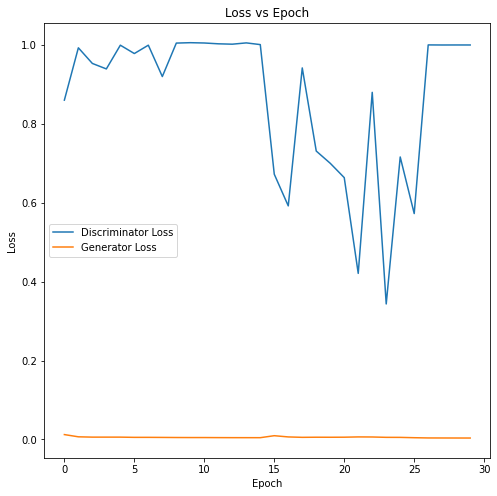

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Loss vs Epoch")
plt.plot(results['Loss_D'], label = "Discriminator Loss")
plt.plot(results['Loss_G'], label = "Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="best")

PSNR SSIM Trends

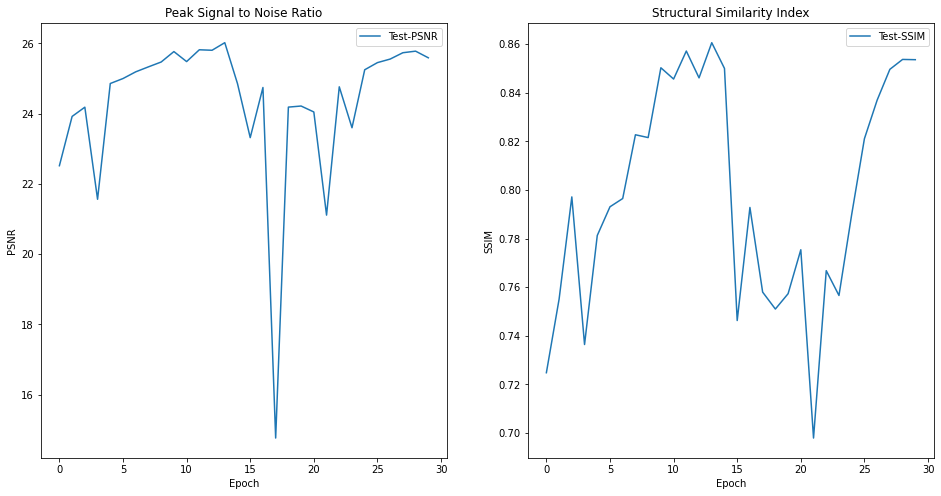

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(16,8))
axs[0].set_title("Peak Signal to Noise Ratio")
axs[0].plot(results['PSNR'], label = "Test-PSNR")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("PSNR")
axs[0].legend(loc="best")

axs[1].set_title("Structural Similarity Index")
axs[1].plot(results['SSIM'], label = "Test-SSIM")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("SSIM")
axs[1].legend(loc="best")